In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline 

In [2]:
data=pd.read_csv("trials.csv",na_values='null')        

In [7]:
pd.set_option('display.max_columns',50)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43962 entries, 0 to 43961
Data columns (total 26 columns):
Rank                       43962 non-null int64
NCT Number                 43962 non-null object
Title                      43962 non-null object
Recruitment                43962 non-null object
Study Results              43962 non-null object
Conditions                 43962 non-null object
Interventions              39709 non-null object
Sponsor/Collaborators      43962 non-null object
Gender                     43919 non-null object
Age                        43962 non-null object
Phases                     28460 non-null object
Enrollment                 43543 non-null float64
Funded Bys                 43962 non-null object
Study Types                43962 non-null object
Study Designs              43444 non-null object
Other IDs                  43954 non-null object
First Received             43962 non-null object
Start Date                 43602 non-null object
Completio

In [9]:
data.isnull().sum()

Rank                           0
NCT Number                     0
Title                          0
Recruitment                    0
Study Results                  0
Conditions                     0
Interventions               4253
Sponsor/Collaborators          0
Gender                        43
Age                            0
Phases                     15502
Enrollment                   419
Funded Bys                     0
Study Types                    0
Study Designs                518
Other IDs                      8
First Received                 0
Start Date                   360
Completion Date             7097
Last Updated                   0
Last Verified                  0
Results First Received         0
Acronym                    33579
Primary Completion Date     1378
Outcome Measures            1101
URL                            0
dtype: int64

In [10]:
data.describe(include=['object'])

,NCT Number,Title,Recruitment,Study Results,Conditions,Interventions,Sponsor/Collaborators,Gender,Age,Phases,Funded Bys,Study Types,Study Designs,Other IDs,First Received,Start Date,Completion Date,Last Updated,Last Verified,Results First Received,Acronym,Primary Completion Date,Outcome Measures,URL
count,43962,43962,43962,43962,43962,39709,43962,43919,43962,28460,43962,43962,43444,43954,43962,43602,36865,43962,43962,43962,10383,42584,42861,43962
unique,43962,43894,12,2,18567,34002,15139,3,1252,7,36,3,1413,43712,3265,337,430,2785,157,1463,9438,429,41530,43962
top,NCT00632749,Phase 3 Study of KHK7580,Recruiting,No Results Available,Breast Cancer,Behavioral: Questionnaire,National Cancer Institute (NCI),Both,"18 Years and older (Adult, Senior)",Phase 2,Other,Interventional,Endpoint Classification: Safety/Efficacy Study...,1,9-May-09,Jan-15,Dec-16,1-Aug-16,Jul-16,No Study Results Posted,IRE,Dec-16,Number of Adverse Events,https://ClinicalTrials.gov/show/NCT02119897
freq,1,3,14915,40069,2184,66,748,34809,23363,11633,22592,35610,6297,29,208,511,1503,489,3107,40069,17,1755,81,1


In [11]:
data.head(5)

,Rank,NCT Number,Title,Recruitment,Study Results,Conditions,Interventions,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Types,Study Designs,Other IDs,First Received,Start Date,Completion Date,Last Updated,Last Verified,Results First Received,Acronym,Primary Completion Date,Outcome Measures,URL
0,1,NCT01638533,"Romidepsin in Treating Patients With Lymphoma,...",Recruiting,No Results Available,Adult Mixed Glioma|Adult Pineal Gland Astrocyt...,Other: Pharmacological Study|Drug: Romidepsin,National Cancer Institute (NCI)|Celgene Corpor...,Both,"18 Years and older (Adult, Senior)",Phase 1,132.0,NIH|Industry,Interventional,Endpoint Classification: Safety Study|Interven...,NCI-2012-01040|NA_00052587|NCI-2013-01545|CDR0...,9-Jul-12,Jun-12,NaN,19-Jul-16,Apr-16,No Study Results Posted,NaN,Sep-17,Dose-limiting toxicity of romidepsin in groups...,https://ClinicalTrials.gov/show/NCT01638533
1,2,NCT01460134,A Study of CDX-1127 (Varlilumab) in Patients W...,"Active, not recruiting",No Results Available,"CD27 Expressing B-cell Malignancies, (for Exam...",Drug: CDX-1127|Drug: CDX-1127|Drug: CDX-1127,Celldex Therapeutics,Both,"18 Years and older (Adult, Senior)",Phase 1,90.0,Industry,Interventional,Allocation: Non-Randomized|Endpoint Classifica...,CDX1127-01,12-Oct-11,Oct-11,Dec-16,5-Apr-16,Apr-16,No Study Results Posted,NaN,Dec-15,Characterize the adverse events associated wit...,https://ClinicalTrials.gov/show/NCT01460134
2,3,NCT01660776,BMS_PD-L1_onco : Assessment of the PD-L1 Prote...,Recruiting,No Results Available,Diffuse Large B-cell Lymphoma|Hodgkin Lymphoma...,NaN,Rennes University Hospital|Roche Pharma AG|Nat...,Both,"18 Years to 75 Years (Adult, Senior)",NaN,325.0,Other|Industry,Observational,Observational Model: Case-Crossover|Time Persp...,2011-A01163-38|B111181-40|11/32-821,31-Jul-12,Jun-12,Jun-17,5-Jul-16,Jul-16,No Study Results Posted,BMS_PD-L1,Jun-17,Description of one or several blood cell types...,https://ClinicalTrials.gov/show/NCT01660776
3,4,NCT00898755,Collecting and Storing Tissue From Young Patie...,Recruiting,No Results Available,Cancer,Genetic: DNA analysis|Genetic: reverse transcr...,Children's Oncology Group|National Cancer Inst...,Both,"up to 21 Years (Child, Adult)",NaN,500.0,Other|NIH,Observational,Observational Model: Case-Only|Time Perspectiv...,ABTR04B1|COG-ABTR04B1|NCI-2009-00326,9-May-09,Mar-07,NaN,17-May-16,May-16,No Study Results Posted,NaN,Jan-20,Establishment and banking of cell lines and/or...,https://ClinicalTrials.gov/show/NCT00898755
4,5,NCT01088763,Gamma-Secretase Inhibitor RO4929097 in Treatin...,Terminated,No Results Available,Childhood Atypical Teratoid/Rhabdoid Tumor|Chi...,Drug: gamma-secretase/Notch signalling pathway...,National Cancer Institute (NCI),Both,"1 Year to 21 Years (Child, Adult)",Phase 1,129.0,NIH,Interventional,Endpoint Classification: Safety Study|Interven...,NCI-2011-02024|COG-ADVL0919|CDR0000667505|ADVL...,16-Mar-10,Mar-10,May-11,4-Nov-14,Oct-11,No Study Results Posted,NaN,May-11,Maximum tolerated dose (MTD) of RO4929097 dete...,https://ClinicalTrials.gov/show/NCT01088763


In [12]:
#what are the different types of clinical trials?
data['Study Types'].unique()

array(['Interventional', 'Observational', 'Expanded Access'], dtype=object)

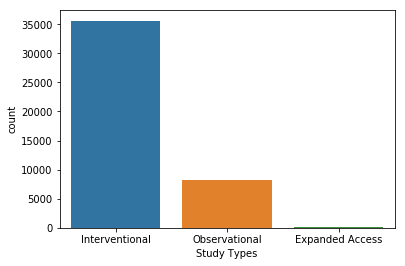

In [13]:
sb.countplot(data['Study Types'])

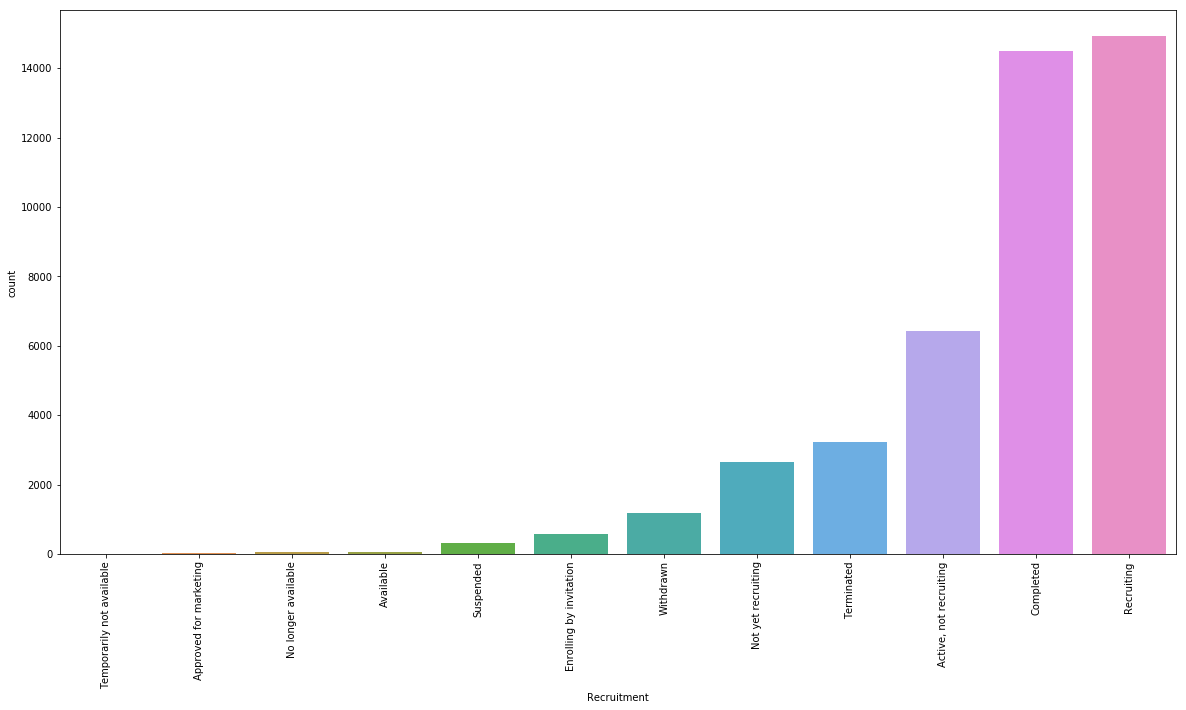

In [17]:
#what are the different recruitment status?
rec_types=data.Recruitment.value_counts()
rec_types=reversed(rec_types.index)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sb.countplot(data['Recruitment'],order=rec_types)

In [101]:
combine={
    'No longer available':'Terminated',
    'Withdrawn':'Terminated',
    'Approved for marketing':'Available',
    'Not yet recruiting':'Suspended',
    'Enrolling by invitation':'Recruiting',
    'Active, not recruiting':'Temporarily not available',
    'Completed':'Completed',
    'Terminated':'Terminated',
    'Suspended':'Suspended',
    'Available':'Available',
    'Recruiting':'Recruiting',
    'Temporarily not available':'Temporarily not available'
}
data['Recruitment']=data['Recruitment'].map(combine)

In [103]:
data['Recruitment'].unique()

array(['Recruiting', 'Temporarily not available', 'Terminated',
       'Suspended', 'Completed', 'Available'], dtype=object)

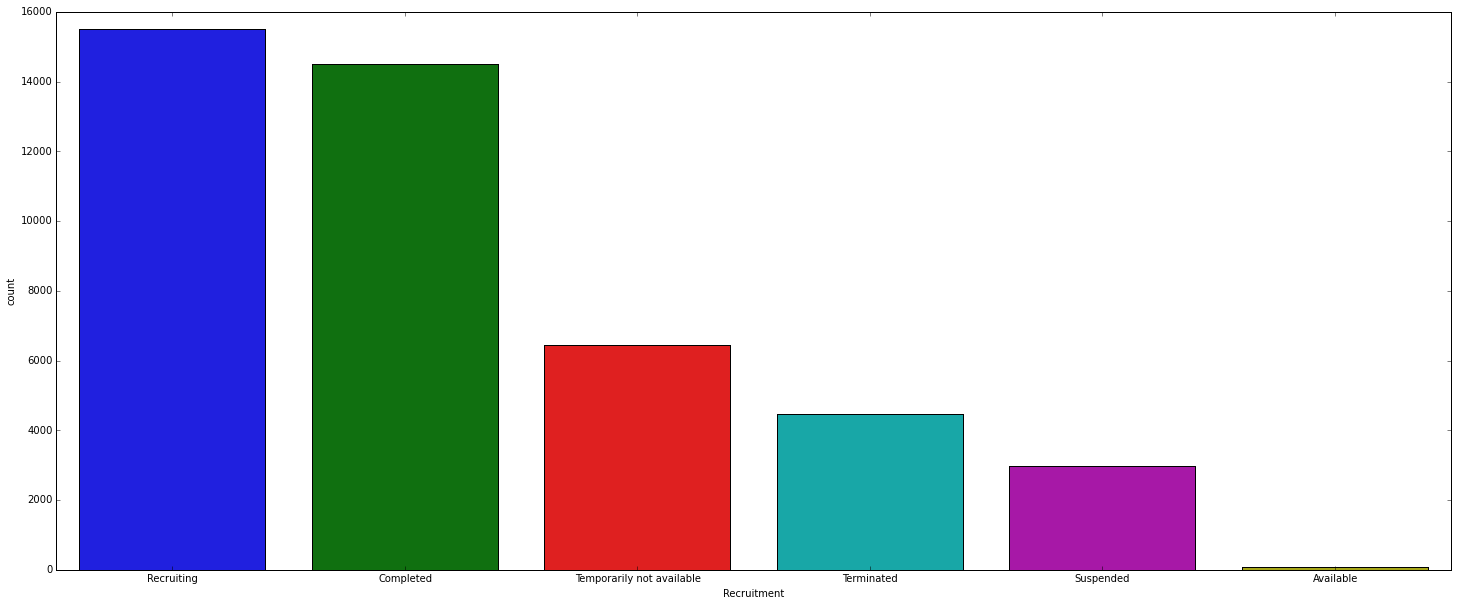

In [106]:
Rec_Types=data.Recruitment.value_counts()
#Different types of recruitment status
plt.figure(figsize=(25,10))
sb.countplot(data['Recruitment'],order=Rec_Types.index)

In [12]:
interventions=set()
for i in data['Interventions']:
    if type(i)!=float:
        for j in i.split('|'):
            interventions.add(j.split(':')[0])

In [13]:
interventions

{'Behavioral',
 'Biological',
 'Device',
 'Dietary Supplement',
 'Drug',
 'Genetic',
 'Other',
 'Procedure',
 'Radiation'}

In [14]:
data['Conditions'][0]

'Adult Mixed Glioma|Adult Pineal Gland Astrocytoma|Adult Solid Neoplasm|AIDS Related Immunoblastic Lymphoma|AIDS-Related Burkitt Lymphoma|AIDS-Related Diffuse Large Cell Lymphoma|AIDS-Related Diffuse Mixed Cell Lymphoma|AIDS-Related Diffuse Small Cleaved Cell Lymphoma|AIDS-Related Hodgkin Lymphoma|AIDS-Related Lymphoblastic Lymphoma|AIDS-Related Lymphoma|AIDS-Related Primary Central Nervous System Lymphoma|Glioma|Lymphoma|Recurrent Adult Brain Neoplasm|Recurrent Adult Soft Tissue Sarcoma|Recurrent Bladder Carcinoma|Recurrent Breast Carcinoma|Recurrent Chronic Lymphocytic Leukemia|Recurrent Colorectal Carcinoma|Recurrent Cutaneous T-Cell Non-Hodgkin Lymphoma|Recurrent Head and Neck Carcinoma|Recurrent Lung Carcinoma|Recurrent Mature T- and NK-Cell Non-Hodgkin Lymphoma|Recurrent Melanoma|Recurrent Pancreatic Carcinoma|Recurrent Prostate Carcinoma|Recurrent Renal Cell Carcinoma|Recurrent Thyroid Gland Carcinoma|Refractory Chronic Lymphocytic Leukemia|Refractory Cutaneous T-Cell Non-Hodgki

In [15]:
#which institutions have sponsered most trials?
data['Sponsor/Collaborators'][0]

'National Cancer Institute (NCI)|Celgene Corporation'

In [16]:
sponsers=[]
for sp in data['Sponsor/Collaborators']:
    for j in sp.split('|'):
        sponsers.append(j)

In [17]:
sponsers

['National Cancer Institute (NCI)',
 'Celgene Corporation',
 'Celldex Therapeutics',
 'Rennes University Hospital',
 'Roche Pharma AG',
 'National Research Agency, France',
 "Children's Oncology Group",
 'National Cancer Institute (NCI)',
 'National Cancer Institute (NCI)',
 'M.D. Anderson Cancer Center',
 'Patient-Centered Outcomes Research Institute',
 'Alliance for Clinical Trials in Oncology',
 "Woman's Cancer Foundation",
 "Children's Oncology Group",
 'National Cancer Institute (NCI)',
 'Gynecologic Oncology Group',
 'National Cancer Institute (NCI)',
 'M.D. Anderson Cancer Center',
 'Susan G. Komen Breast Cancer Foundation',
 'Kellogg Company',
 'Janssen-Cilag Ltd.',
 'Sun Yat-sen University',
 'Clinical Directors Network',
 'European Organisation for Research and Treatment of Cancer - EORTC',
 'European Thoracic Oncology Platform',
 'Medical University of Vienna',
 'Onyx Therapeutics, Inc.',
 'Onyx Pharmaceuticals',
 'G. Hatzikosta General Hospital',
 'University of Ioannina',


In [18]:
sponsers=list(sponsers)
sponsers.sort()

In [19]:
institutes=[]
for sp in sponsers:
    if sp.find('Institute')!=-1:
        institutes.append(sp)

In [20]:
len(institutes)

10312

In [21]:
pd.Series(institutes).value_counts()

National Cancer Institute (NCI)                                                                    5448
National Institutes of Health Clinical Center (CC)                                                  694
Dana-Farber Cancer Institute                                                                        503
National Institutes of Health (NIH)                                                                 294
H. Lee Moffitt Cancer Center and Research Institute                                                 224
Roswell Park Cancer Institute                                                                       168
National Heart, Lung, and Blood Institute (NHLBI)                                                   148
The Netherlands Cancer Institute                                                                     91
University of Minnesota - Clinical and Translational Science Institute                               87
OHSU Knight Cancer Institute                                    

In [22]:
d=pd.Series(institutes).value_counts()

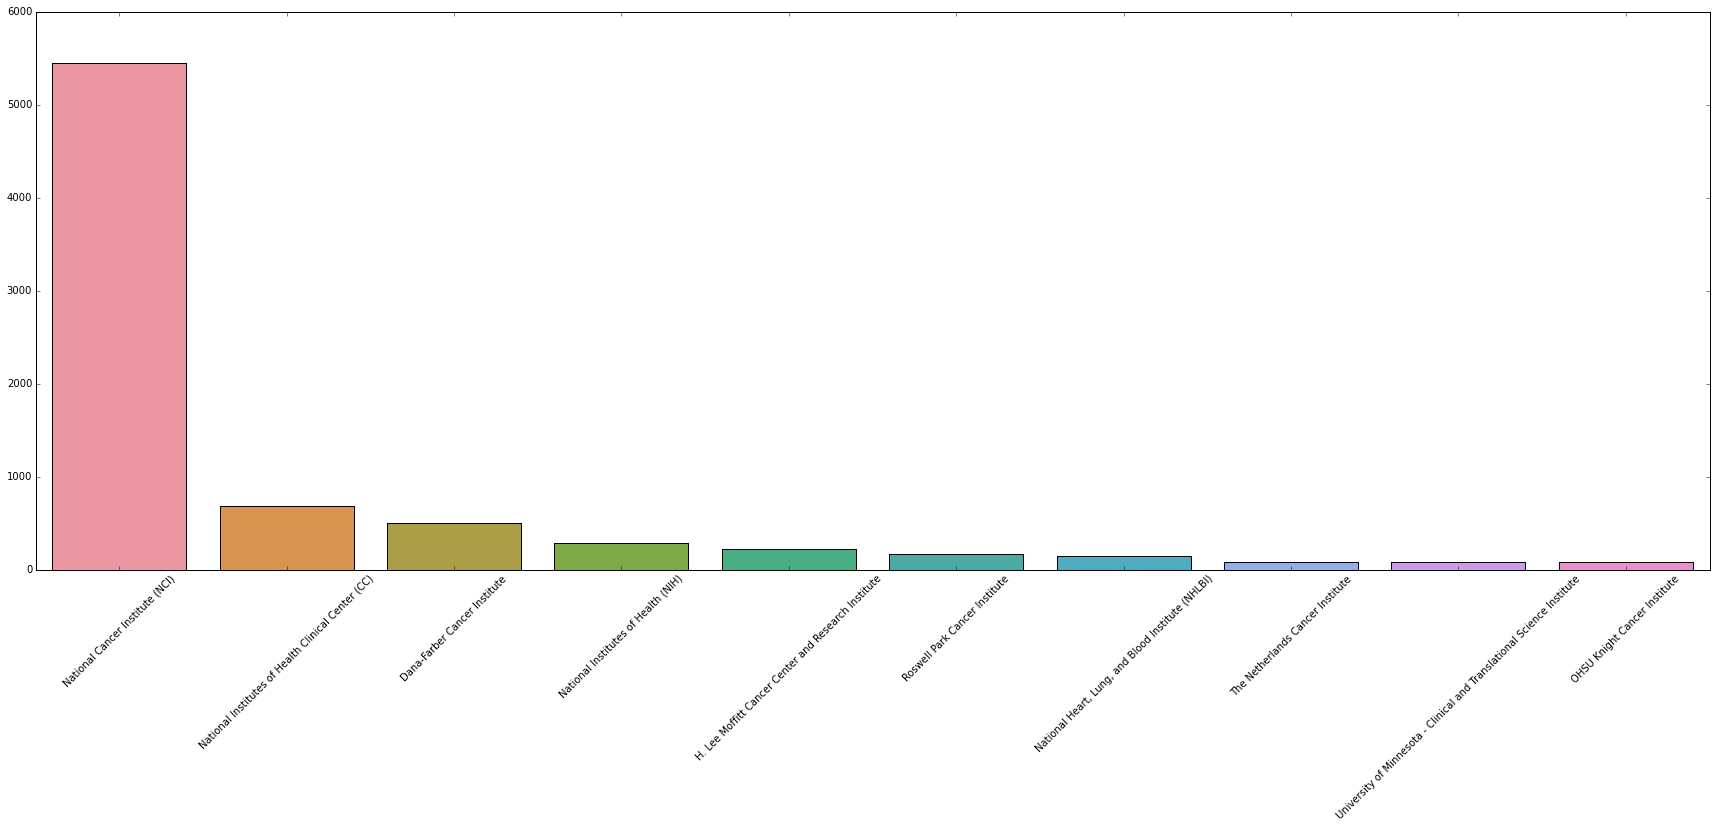

In [23]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
sb.barplot(d.index[:10],d.values[:10])

In [24]:
data.Gender.value_counts()

Both      34809
Female     6567
Male       2543
dtype: int64

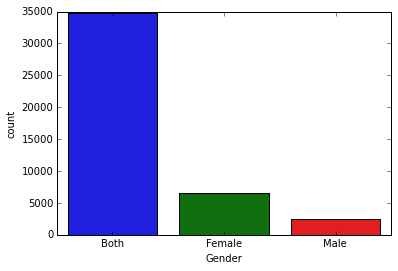

In [25]:
sb.countplot(data.Gender)

In [26]:
age=[]
for i in data.Age:
    st=i.split('(')
    age.append(st[-1].split(')')[0])

In [130]:
data['age_categories']=age

In [28]:
l=pd.Series(age).value_counts()

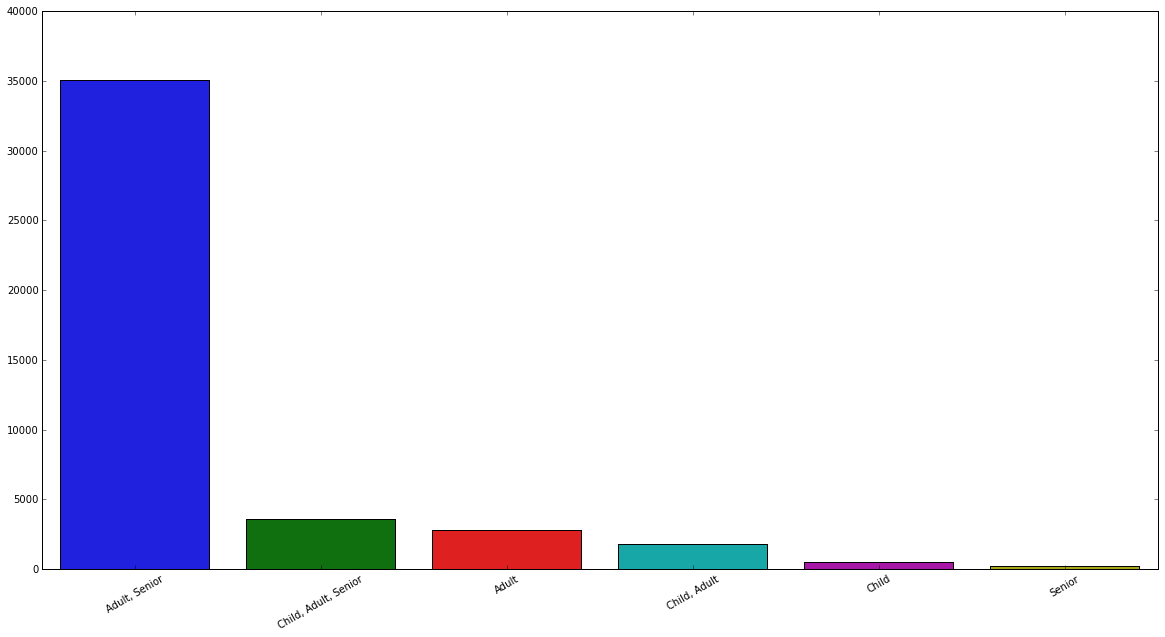

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sb.barplot(l.index,l.values)

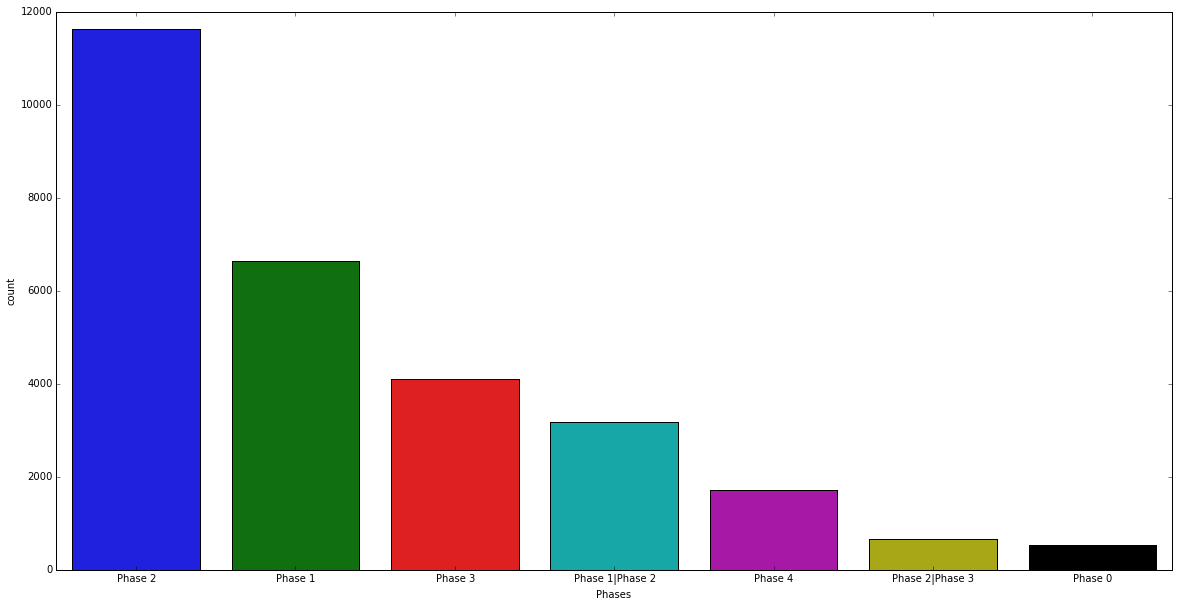

In [107]:
plt.figure(figsize=(20,10))
sb.countplot(data.Phases,order=data.Phases.value_counts().index)

In [31]:
data['Last Verified']

0        Apr-16
1        Apr-16
2        Jul-16
3        May-16
4        Oct-11
5        Feb-16
6        Aug-10
7        Jul-16
8        Jun-15
9        Aug-16
10       Jul-16
11       Aug-15
12       Jul-16
13       May-16
14       Sep-15
15       Mar-16
16       Nov-11
17       Dec-15
18       Feb-16
19       Jan-16
20       Aug-11
21       Jan-16
22       Jun-16
23       Apr-15
24       Nov-14
25       Dec-15
26       Jun-16
27       Apr-10
28       Jun-16
29       Sep-15
          ...  
43932    Apr-15
43933    Aug-10
43934    Nov-13
43935    Jun-11
43936    Dec-08
43937    May-11
43938    Mar-08
43939    Mar-15
43940    Dec-10
43941    Jun-10
43942    Jan-16
43943    Apr-16
43944    Jul-08
43945    Apr-09
43946    Sep-15
43947    Nov-13
43948    Mar-07
43949    Jan-16
43950    Dec-15
43951    Dec-15
43952    May-11
43953    Mar-16
43954    Jun-15
43955    Sep-14
43956    Aug-13
43957    Apr-16
43958    Mar-16
43959    Jan-16
43960    Nov-12
43961    Apr-14
Name: Last Verified, dty

In [32]:
import datetime
now=datetime.datetime.strptime(data['Last Updated'][0],'%d-%b-%y')
print(now)


2016-07-19 00:00:00


In [33]:
dat1=datetime.datetime.strptime(data['Last Updated'][0],'%d-%b-%y')
dat2=datetime.datetime.strptime(data['First Received'][0],'%d-%b-%y')
print(dat1-dat2)

1471 days, 0:00:00


In [34]:
from dateutil.relativedelta import relativedelta
rdelta=relativedelta(dat1,dat2)
print('years',rdelta.years)
print('months',rdelta.months)
print('days',rdelta.days)
print(rdelta)

years 4
months 0
days 10
relativedelta(years=+4, days=+10)


In [35]:
#time taken for each trial in days and years
days=[]
time=[]
for start,first,last,completion in zip(data['Start Date'],data['First Received'],data['Last Updated'],data['Completion Date']):
    if(type(start)!=float):
        firs=datetime.datetime.strptime(start,'%b-%y')
    else:
        firs=datetime.datetime.strptime(first,'%d-%b-%y')
    if(type(completion)!=float):
        second=datetime.datetime.strptime(completion,'%b-%y')
    else:
        second=datetime.datetime.strptime(last,'%d-%b-%y')
    days.append((second-firs).days)
    rdelta=relativedelta(second,firs)
    time.append(rdelta)

In [36]:
data['days_taken']=days
data['time_taken']=time

In [37]:
years=[]
for i in data['time_taken']:
    years.append(i.years)
years

[4,
 5,
 5,
 9,
 1,
 1,
 3,
 5,
 5,
 5,
 1,
 6,
 3,
 3,
 13,
 9,
 2,
 2,
 4,
 9,
 2,
 6,
 0,
 1,
 3,
 8,
 2,
 5,
 0,
 15,
 6,
 4,
 3,
 0,
 3,
 5,
 10,
 3,
 4,
 4,
 4,
 3,
 6,
 3,
 0,
 11,
 5,
 15,
 8,
 2,
 2,
 1,
 0,
 6,
 9,
 3,
 5,
 11,
 9,
 2,
 3,
 3,
 2,
 5,
 1,
 7,
 3,
 10,
 15,
 3,
 4,
 2,
 4,
 8,
 8,
 5,
 5,
 0,
 2,
 1,
 3,
 2,
 5,
 8,
 1,
 4,
 6,
 1,
 4,
 7,
 2,
 2,
 2,
 21,
 1,
 5,
 2,
 1,
 2,
 2,
 0,
 1,
 4,
 3,
 3,
 3,
 3,
 6,
 2,
 3,
 10,
 0,
 15,
 2,
 0,
 7,
 3,
 2,
 3,
 7,
 6,
 5,
 3,
 13,
 6,
 7,
 1,
 2,
 3,
 2,
 0,
 20,
 0,
 12,
 7,
 6,
 8,
 16,
 22,
 7,
 1,
 1,
 5,
 4,
 0,
 1,
 4,
 0,
 5,
 1,
 6,
 3,
 5,
 1,
 4,
 4,
 7,
 7,
 3,
 2,
 8,
 3,
 2,
 6,
 10,
 3,
 7,
 2,
 3,
 1,
 4,
 4,
 4,
 8,
 3,
 2,
 4,
 5,
 2,
 0,
 1,
 3,
 1,
 1,
 5,
 0,
 8,
 2,
 3,
 2,
 6,
 4,
 4,
 7,
 12,
 9,
 0,
 4,
 4,
 2,
 3,
 16,
 7,
 1,
 2,
 1,
 3,
 5,
 0,
 6,
 2,
 1,
 2,
 4,
 5,
 10,
 5,
 1,
 5,
 4,
 8,
 6,
 5,
 5,
 2,
 1,
 0,
 3,
 3,
 3,
 5,
 4,
 6,
 6,
 7,
 8,
 4,
 1,
 5,
 6,
 12,
 2,
 7,
 6,
 5,

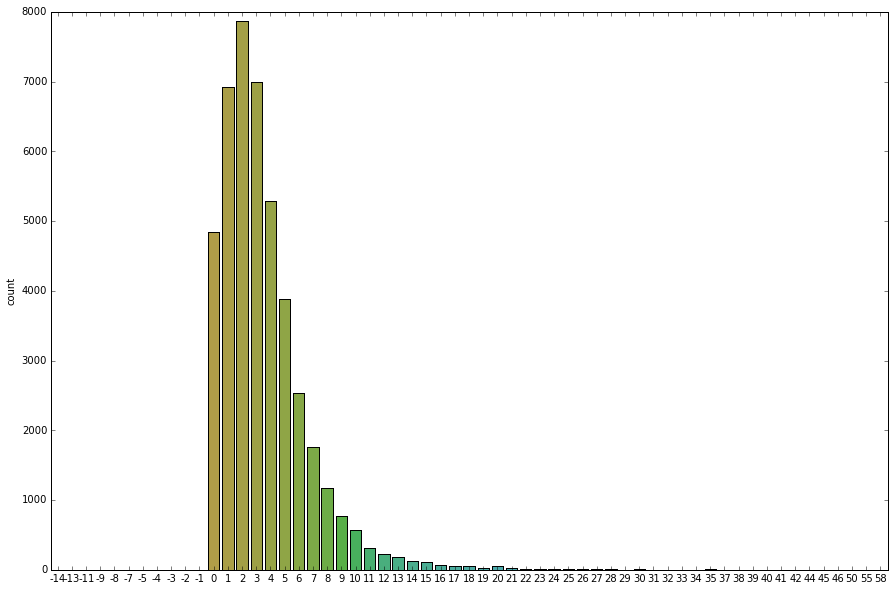

In [38]:
plt.figure(figsize=(15,10))
sb.countplot(years)

In [39]:
#filling null values in Enrollment 
data['Enrollment']=data['Enrollment'].fillna(data['Enrollment'].mode())

In [40]:
data['Enrollment'].unique()

array([  1.32000000e+02,   9.00000000e+01,   3.25000000e+02, ...,
         1.89629000e+05,   3.98800000e+03,   1.75400000e+03])

In [41]:
#count of funders of different types
data['Funded Bys']

0              NIH|Industry
1                  Industry
2            Other|Industry
3                 Other|NIH
4                       NIH
5                     Other
6                     Other
7                 Other|NIH
8                 Other|NIH
9            Other|Industry
10                 Industry
11                    Other
12                    Other
13                    Other
14                    Other
15                 Industry
16                    Other
17                    Other
18       Other|U.S. Fed|NIH
19                    Other
20                Other|NIH
21                Other|NIH
22                Other|NIH
23                 Industry
24                    Other
25                    Other
26                    Other
27                    Other
28           Other|Industry
29                    Other
                ...        
43932        Industry|Other
43933                 Other
43934             Other|NIH
43935              Industry
43936               

In [42]:
funders=[]
for f in data['Funded Bys']:
    for j in f.split('|'):
        funders.append(j)
funders

['NIH',
 'Industry',
 'Industry',
 'Other',
 'Industry',
 'Other',
 'NIH',
 'NIH',
 'Other',
 'Other',
 'Other',
 'NIH',
 'Other',
 'NIH',
 'Other',
 'Industry',
 'Industry',
 'Other',
 'Other',
 'Other',
 'Other',
 'Industry',
 'Other',
 'Other',
 'Other',
 'U.S. Fed',
 'NIH',
 'Other',
 'Other',
 'NIH',
 'Other',
 'NIH',
 'Other',
 'NIH',
 'Industry',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Industry',
 'Other',
 'Other',
 'Other',
 'NIH',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'NIH',
 'Other',
 'NIH',
 'Other',
 'Other',
 'NIH',
 'Industry',
 'Other',
 'Industry',
 'NIH',
 'Other',
 'NIH',
 'Other',
 'Other',
 'NIH',
 'Other',
 'NIH',
 'Other',
 'NIH',
 'NIH',
 'Other',
 'Other',
 'Industry',
 'Other',
 'Other',
 'NIH',
 'Industry',
 'Other',
 'Other',
 'Other',
 'NIH',
 'Other',
 'NIH',
 'NIH',
 'Other',
 'NIH',
 'Other',
 'Other',
 'Other',
 'NIH',
 'Other',
 'NIH',
 'Industry',
 'Other',
 'Industry',
 'Other',
 'NIH',
 'U.S. Fed',
 'NIH',
 'Other',
 'Other'

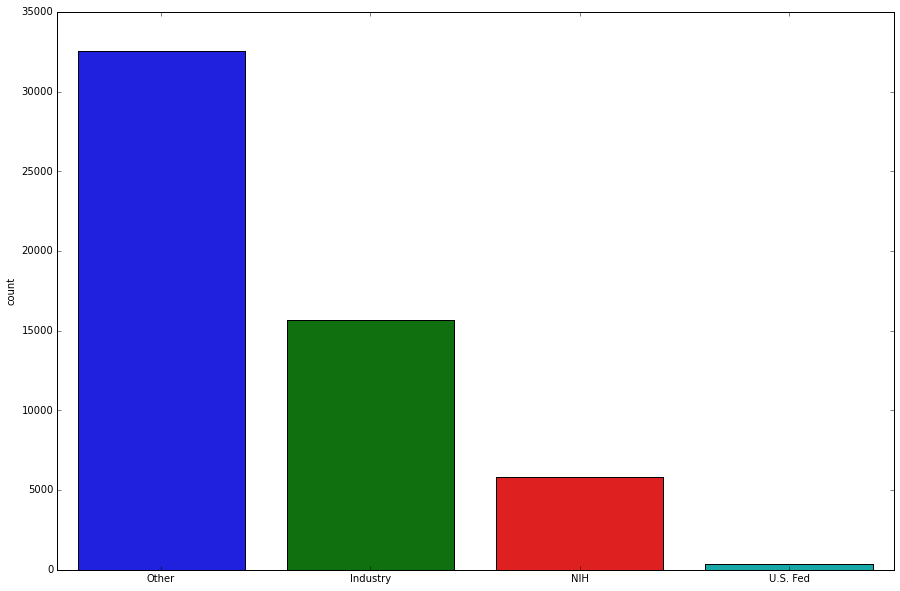

In [110]:
plt.figure(figsize=(15,10))
c=pd.Series(funders).value_counts().index
sb.countplot(funders,order=c)

In [44]:
#different features in study_designs
study_designs=set()
for st in data['Study Designs']:
    if(type(st)!=float):
        for j in st.split('|'):
            study_designs.add(j.split(':')[0])
study_designs

{'Allocation',
 'Endpoint Classification',
 'Intervention Model',
 'Masking',
 'Observational Model',
 'Primary Purpose',
 'Time Perspective'}

In [111]:
feature=dict()
for f in study_designs:
    print(f)
    feature[f]=[np.nan]*(data.shape[0])
i=-1
for sd in data['Study Designs']:
    i=i+1
    if(type(sd)!=float):
        for j in sd.split('|'):
            feature[j.split(':')[0]][i]=(j.split(':')[1].split('(')[0])
            

Allocation
Masking
Time Perspective
Intervention Model
Primary Purpose
Observational Model
Endpoint Classification


In [46]:
for f in study_designs:
    print(feature[f][:5])

[nan, ' Non-Randomized', nan, nan, nan]
[' Open Label', ' Open Label', nan, nan, ' Open Label']
[nan, nan, ' Prospective', ' Cross-Sectional', nan]
[' Single Group Assignment', ' Parallel Assignment', nan, nan, ' Single Group Assignment']
[' Treatment', ' Treatment', nan, nan, ' Treatment']
[nan, nan, ' Case-Crossover', ' Case-Only', nan]
[' Safety Study', ' Safety Study', nan, nan, ' Safety Study']


In [47]:
print(data['Study Designs'][1])

Allocation: Non-Randomized|Endpoint Classification: Safety Study|Intervention Model: Parallel Assignment|Masking: Open Label|Primary Purpose: Treatment


In [48]:
data['Time Perspective']=feature['Time Perspective']
data['Primary Purpose']=feature['Primary Purpose']
data['Observational Model']=feature['Observational Model']
data['Endpoint Classification']=feature['Endpoint Classification']
data['Intervention Model']=feature['Intervention Model']
data['Masking']=feature['Masking']
data['Allocation']=feature['Allocation']

In [49]:
data['Masking'][data['Masking']==' Double-Blind']='Double Blind'
data['Masking'][data['Masking']==' Double Blind ']='Double Blind'
data['Masking'][data['Masking']==' Single Blind ']='Single Blind'
data['Masking'][data['Masking']==' Single Blind']='Single Blind'
data['Masking'].unique()

C:\Users\Shubham\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Shubham\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\Shubham\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Shubh

array([' Open Label', nan, 'Double Blind', 'Single Blind'], dtype=object)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 43961
Data columns (total 35 columns):
Rank                       43962 non-null int64
NCT Number                 43962 non-null object
Title                      43962 non-null object
Recruitment                43962 non-null object
Study Results              43962 non-null object
Conditions                 43962 non-null object
Interventions              39709 non-null object
Sponsor/Collaborators      43962 non-null object
Gender                     43919 non-null object
Age                        43962 non-null object
Phases                     28460 non-null object
Enrollment                 43543 non-null float64
Funded Bys                 43962 non-null object
Study Types                43962 non-null object
Study Designs              43444 non-null object
Other IDs                  43954 non-null object
First Received             43962 non-null object
Start Date                 43602 non-null object
Completio

In [51]:
len(data['Allocation'])

43962

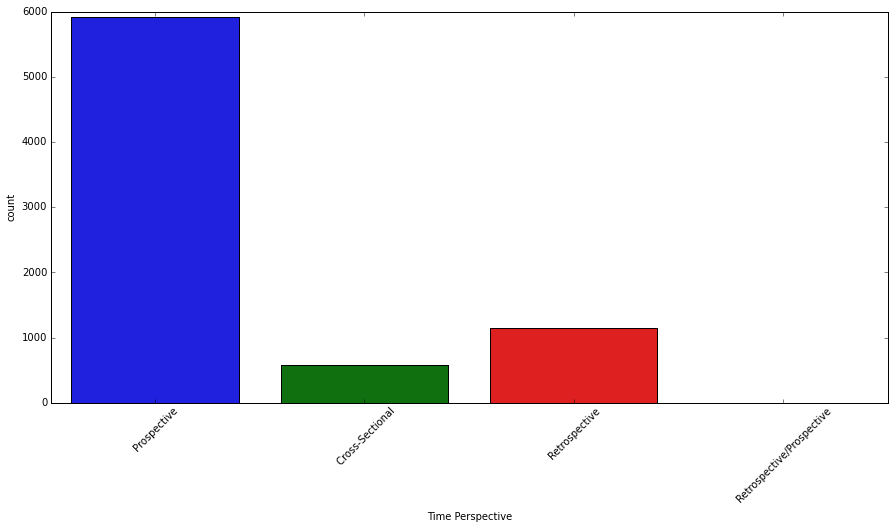

In [52]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sb.countplot(data['Time Perspective'])

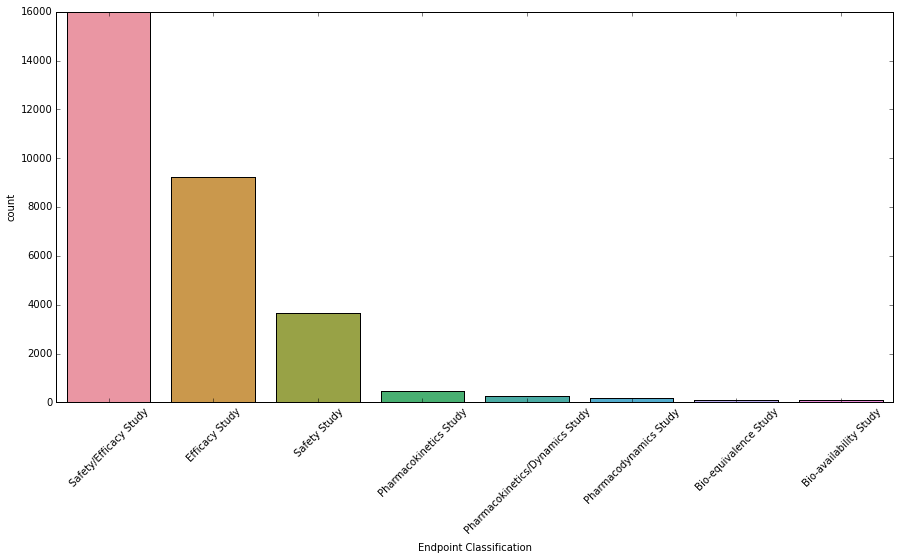

In [53]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sb.countplot(data['Endpoint Classification'],order=(data['Endpoint Classification'].value_counts()).index)

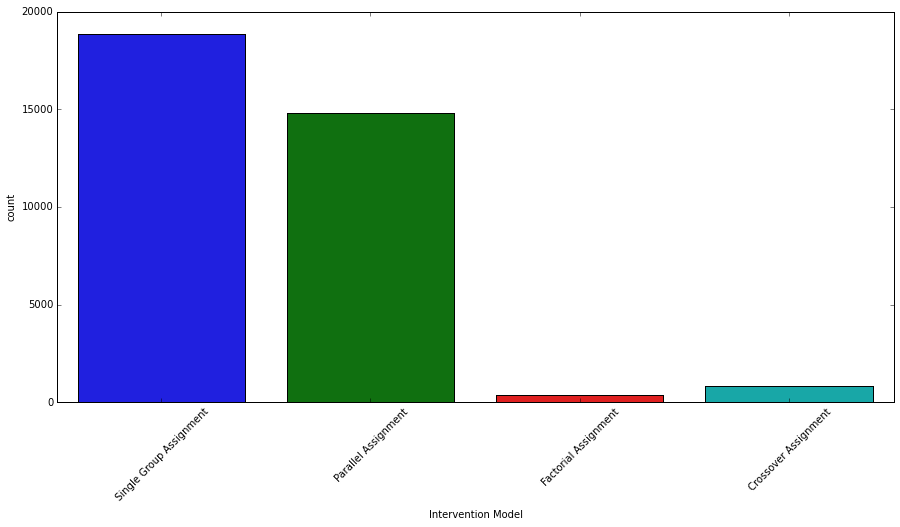

In [54]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sb.countplot(data['Intervention Model'])

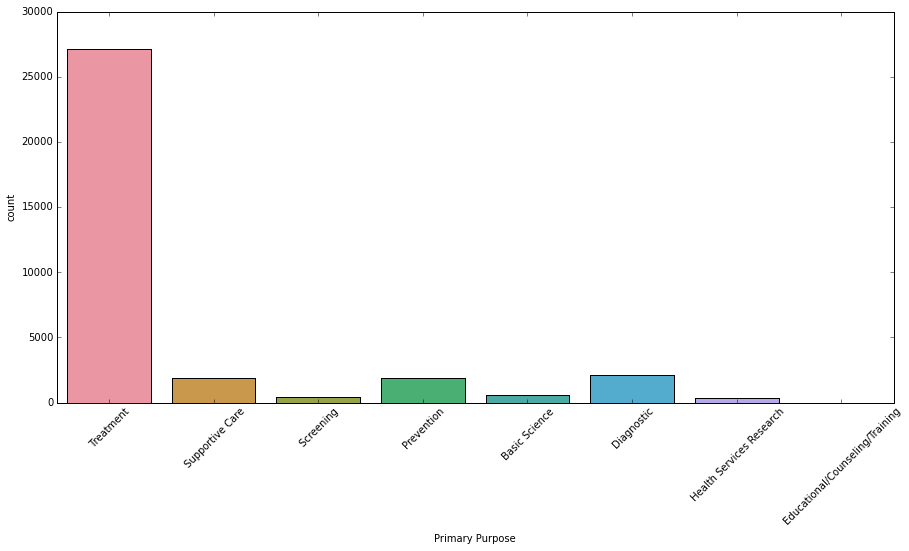

In [55]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sb.countplot(data['Primary Purpose'])

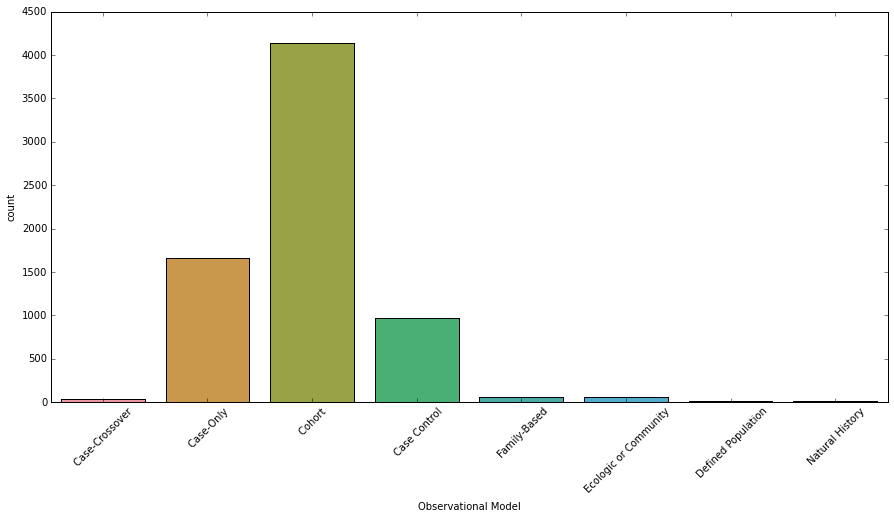

In [56]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sb.countplot(data['Observational Model'])

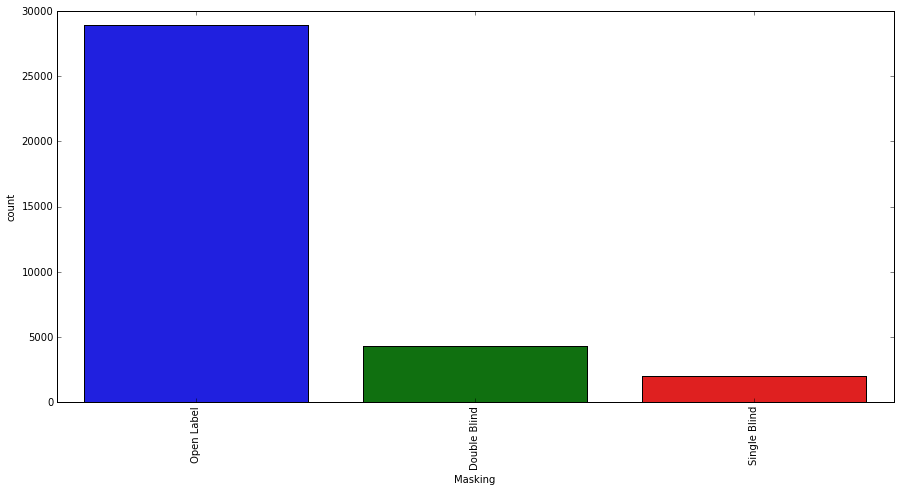

In [57]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sb.countplot(data['Masking'])

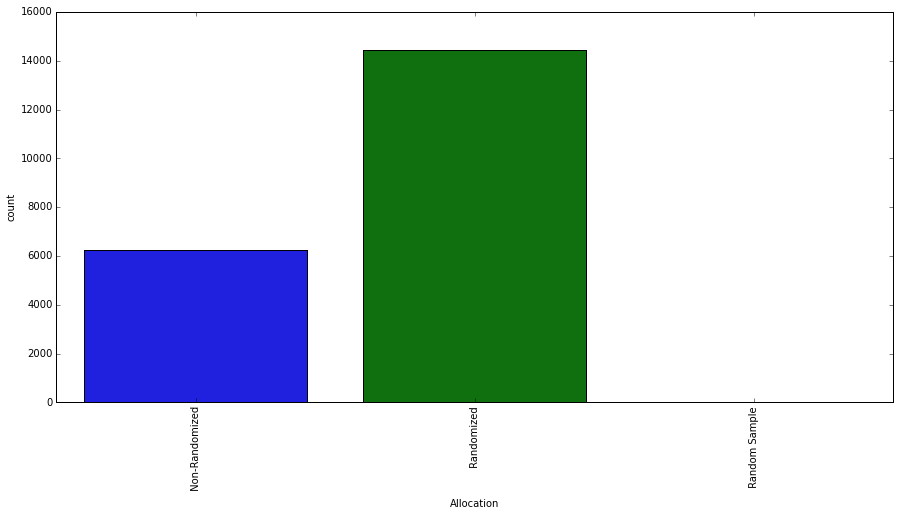

In [58]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sb.countplot(data['Allocation'])

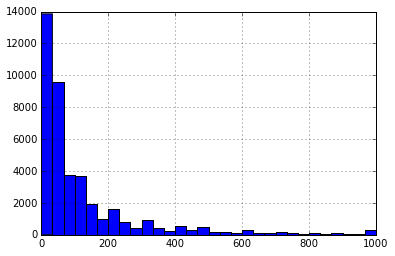

In [59]:
data.Enrollment.hist(range=(0,1000),bins=30)

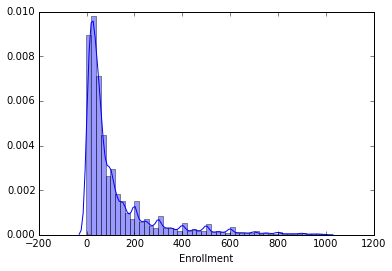

In [60]:
sb.distplot(data['Enrollment'][data['Enrollment']<1000])

In [61]:
cancer_sites = [('breast', 'Breast'), ('lung', 'Lung'), ('colo', 'Colorectal'), ('prostate', 'Prostate'),
                ('pancrea', 'Pancreatic'), ('thyroid', 'Thyroid'), ('ovar', 'Ovarian'), ('melanoma', 'Melanoma'),
               ('esoph', 'Esophageal'), ('myeloma', 'Multiple Myeloma'), ('lymphoma', 'Lymphomas'),
                ('leukemia', 'Leukemias'), ('uter', 'Uterine'), ('bladder', 'Bladder'), ('cerv', 'Cervical'),
               ('head and neck', 'Head and Neck'), ('liver', 'Liver'), ('testi', 'Testicular')]

cancer_sites_mult_names = [(('brain', 'glio'), 'Brain'), (('kidney', 'renal'), 'Kidney'), (('stomach', 'gastric'), 'Gastric'),
                           (('bone', 'osteos'), 'Bone'), (('soft tissue', 'gastrointestinal stromal'), 'Soft-tissue')]

In [62]:
for search_term, site in cancer_sites:
    data[site] = data.Conditions.str.contains(search_term, case=False)
    data[site] = data[site].map({True:1, False:0})

for search_terms, site in cancer_sites_mult_names:
    data[site] = ((data.Conditions.str.contains(search_terms[0], case=False)) | 
                     (data.Conditions.str.contains(search_terms[1], case=False)))
    data[site] = data[site].map({True:1, False:0})
    


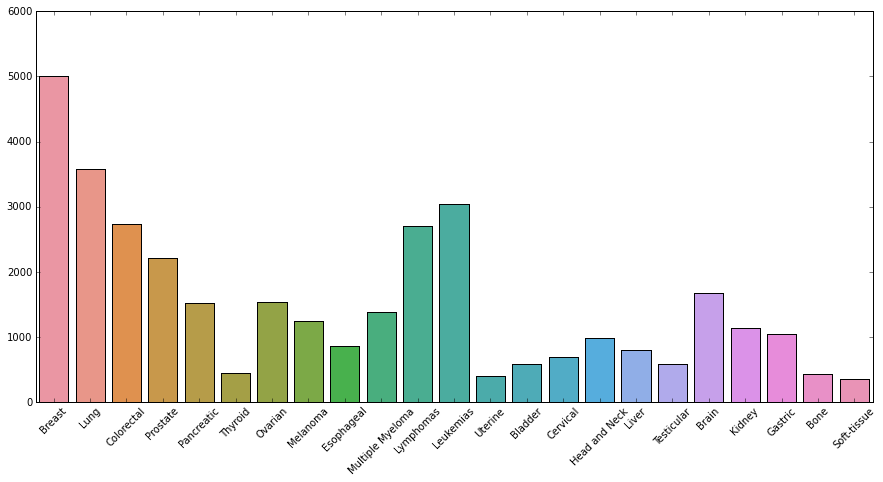

In [100]:
from operator import itemgetter
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
col=data.loc[:,'Breast':].sum()
sb.barplot(col.index,col.values)

Recruitment                Study Results       
Available                  No Results Available     0.227108
Completed                  Has Results             67.171847
                           No Results Available    29.671317
Recruiting                 No Results Available    38.668297
Suspended                  Has Results              0.051374
                           No Results Available     7.402231
Temporarily not available  Has Results              8.913434
                           No Results Available    15.218748
Terminated                 Has Results             23.863344
                           No Results Available     8.812299
dtype: float64


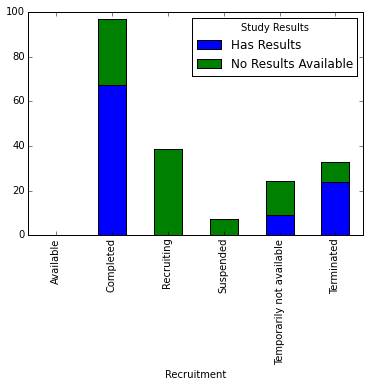

In [124]:
se=data['Study Results'].value_counts()
x=data.groupby(['Recruitment','Study Results']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for j in x[i].index:
        x[i][j]=(float(x[i][j]))/float(se[j])*100
x.unstack().plot(kind='bar',stacked=True)

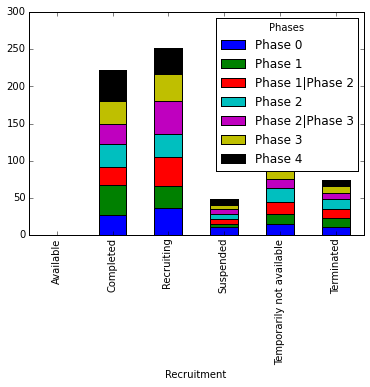

In [125]:
se=data['Phases'].value_counts()
x=data.groupby(['Recruitment','Phases']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for j in x[i].index:
        x[i][j]=(float(x[i][j]))/float(se[j])*100
x.unstack().plot(kind='bar',stacked=True)

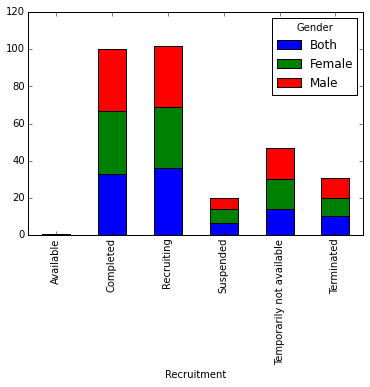

In [126]:
se=data['Gender'].value_counts()
x=data.groupby(['Recruitment','Gender']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for j in x[i].index:
        x[i][j]=(float(x[i][j]))/float(se[j])*100
x.unstack().plot(kind='bar',stacked=True)

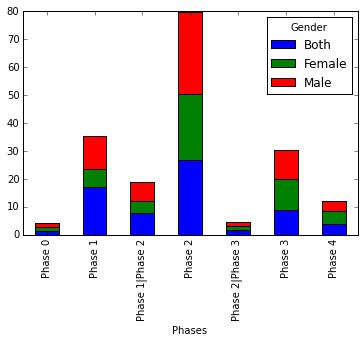

In [127]:
se=data['Gender'].value_counts()
x=data.groupby(['Phases','Gender']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for j in x[i].index:
        x[i][j]=(float(x[i][j]))/float(se[j])*100
x.unstack().plot(kind='bar',stacked=True)

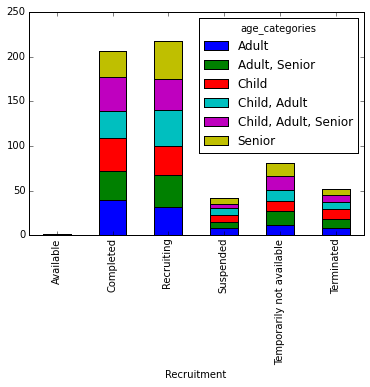

In [131]:
se=data['age_categories'].value_counts()
x=data.groupby(['Recruitment','age_categories']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for j in x[i].index:
        x[i][j]=(float(x[i][j]))/float(se[j])*100
x.unstack().plot(kind='bar',stacked=True)

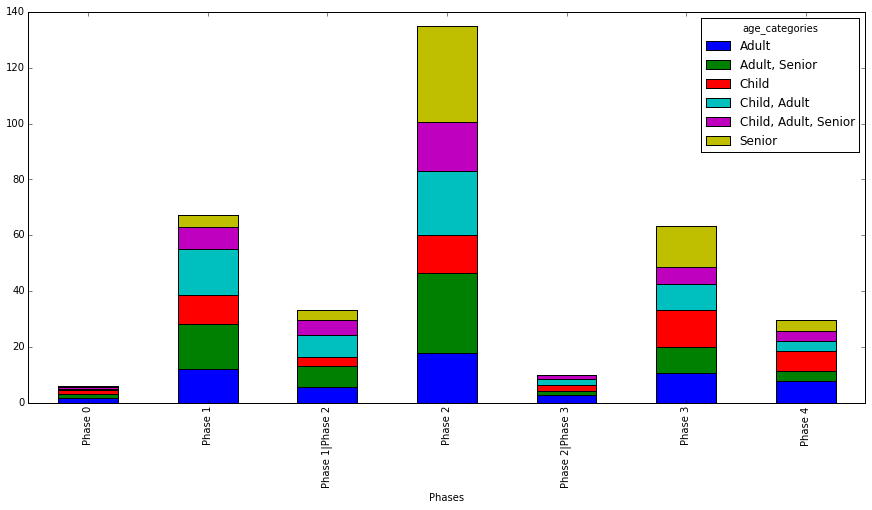

In [137]:

se=data['age_categories'].value_counts()
x=data.groupby(['Phases','age_categories']).size()
x=x.astype(float)
for i in x.index.levels[0]:
    for j in x[i].index:
        x[i][j]=(float(x[i][j]))/float(se[j])*100
x.unstack().plot(kind='bar',stacked=True,figsize=(15,7))